In [23]:
import pandas as pd
import seaborn as sns

df = pd.read_parquet('./data/')
df.loc[df['wave_direction'] == 'min', 'wave_direction'] = 1
df.loc[df['wave_direction'] == 'max', 'wave_direction'] = -1
df = df.astype({"wave_direction": 'float64'})

# df = df[abs(df['last_price_delta_since_stabilized']) > 1]
# df = df[abs(df['last_price_delta_since_stabilized']) < 8]

# df = df[abs(df['last_price_delta_since_stabilized']) < 10]
# df = df[abs(df['last_price_delta_since_stabilized']) > 0.2]
# df = df[df['stabilized_spread'] < 10] # nem tul nagy spread
df = df[df['stabilized_spread'] > 0.5]  # nem tul kis spread
# df = df[df['stabilized_amount_mean'] < 0.4]  # nem tul nagy tradek
# df = df[df['stabilized_nr_trades'] < 300]  # nem tul sok trade

for col in df.columns:
    # if 'nr_trades' in col or 'price_delta' in col and not col.startswith('last'):
    #     df.drop(col, axis=1, inplace=True)
    if 'past' in col:
        df.drop(col, axis=1, inplace=True)
    if '_spread' == col[1:]:
        df.drop(col, axis=1, inplace=True)
# df.drop('wave_direction', axis=1, inplace=True)

# df = df[df['0_price_delta'] < 4]

df.reset_index(drop=True, inplace=True)
df

,0_amount_mean,0_nr_trades,0_price_delta,1_amount_mean,1_nr_trades,1_price_delta,2_amount_mean,2_nr_trades,2_price_delta,3_amount_mean,...,4_amount_mean,4_nr_trades,4_price_delta,last_price_delta_since_stabilized,stabilized_amount_mean,stabilized_at_ms,stabilized_nr_trades,stabilized_spread,wave_direction,stabilized_gasp
0,0.0153,11.0,0.55,0.0291,16.0,0.47,0.0305,22.0,0.34,0.0331,...,0.0373,25.0,0.34,0.00,0.0375,174,37.0,2.63,1.0,1.7025
1,0.0436,5.0,0.00,0.0367,6.0,0.00,0.0291,8.0,0.00,0.0233,...,0.0242,16.0,0.00,-0.62,0.0228,146,18.0,0.78,NaN,0.5473
2,0.0268,36.0,1.00,0.0262,38.0,0.98,0.0256,39.0,0.98,0.0254,...,0.0247,42.0,0.94,0.95,0.0304,437,69.0,2.65,1.0,1.3677
3,0.0457,3.0,0.61,0.0307,5.0,0.61,0.0226,7.0,0.00,0.0198,...,0.0331,9.0,0.00,0.00,0.0381,82,11.0,1.37,NaN,-0.5867
4,0.0331,9.0,0.06,0.0381,11.0,0.06,0.0350,12.0,0.06,0.0358,...,0.0333,14.0,0.02,1.37,0.0304,211,16.0,1.43,1.0,0.6286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20432,0.0134,5.0,0.04,0.0114,6.0,0.04,0.0099,7.0,0.04,0.0082,...,0.0075,10.0,0.04,-0.92,0.0068,133,11.0,0.86,NaN,-0.3914
20433,0.0169,47.0,1.59,0.0259,74.0,0.89,0.0300,110.0,0.00,0.0319,...,0.0317,114.0,0.00,0.00,0.0307,732,118.0,3.37,1.0,0.4177
20434,0.0365,5.0,0.55,0.0329,7.0,0.48,0.0289,8.0,0.46,0.0266,...,0.0240,10.0,0.00,3.10,0.0218,239,11.0,1.51,1.0,0.6103
20435,0.0600,17.0,0.06,0.0568,18.0,0.06,0.0573,19.0,0.06,0.0545,...,0.0520,21.0,0.06,-1.33,0.0496,160,22.0,1.51,-1.0,-0.4266


In [24]:
# sns.scatterplot(x=df['4_nr_trades'], y=abs(df.last_price_delta_since_stabilized))

a = df.corr().last_price_delta_since_stabilized * 1000
a.sort_values(axis=0, ascending=False)

last_price_delta_since_stabilized    1000.000000
wave_direction                        533.144149
stabilized_gasp                        98.555510
stabilized_at_ms                       27.256048
1_price_delta                          19.410173
0_nr_trades                            17.849572
0_price_delta                          17.756663
1_nr_trades                            15.507061
2_nr_trades                            14.744007
2_price_delta                          11.699663
3_nr_trades                            11.112288
4_nr_trades                             9.741234
stabilized_nr_trades                    6.956228
3_price_delta                           6.700859
stabilized_spread                       6.067373
4_price_delta                          -3.541011
1_amount_mean                          -4.067277
2_amount_mean                          -4.360119
3_amount_mean                          -5.030920
0_amount_mean                          -6.192526
4_amount_mean       

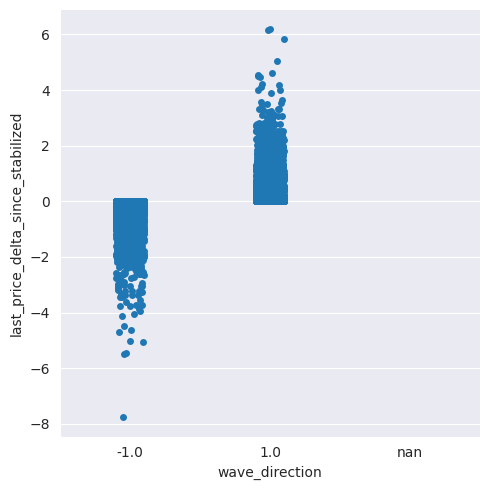

In [3]:
# df.wave_direction.mean()
sns.catplot(x=df.wave_direction, y=df.last_price_delta_since_stabilized)


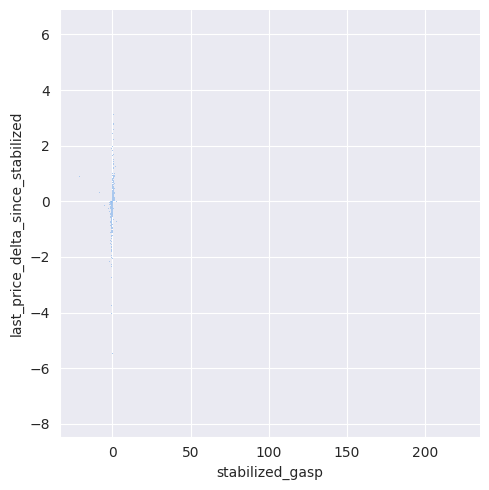

In [8]:
sns.displot(y=df.last_price_delta_since_stabilized, x=df.stabilized_gasp)


<AxesSubplot: xlabel='past_final_price_0', ylabel='last_price_delta_since_stabilized'>

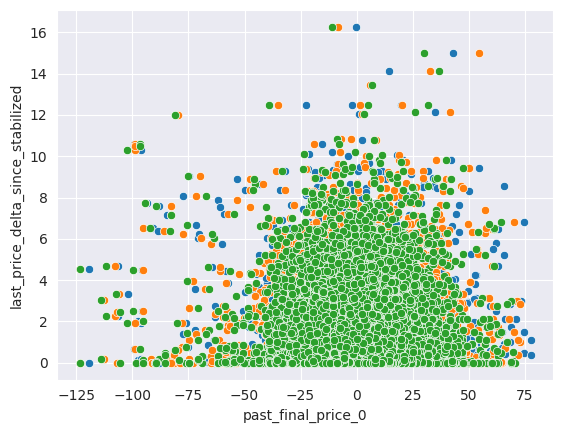

In [6]:
sns.scatterplot(x=df['past_final_price_0'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_1'], y=abs(df.last_price_delta_since_stabilized))
sns.scatterplot(x=df['past_final_price_2'], y=abs(df.last_price_delta_since_stabilized))

